**Dataset:  pima-indians-diabetes.data** is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 

The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Source: Kaggle
https://www.kaggle.com/uciml/pima-indians-diabetes-database


|SlNo|Variable|Description|
|---|--------------|--------------------------------|
|1|Pregnancies|Number of times pregnant|
|2|Glucose|Plasma glucose concentration a 2 hours in an oral glucose tolerance test|
|3|BloodPressure|Diastolic blood pressure (mm Hg)|
|4|SkinThickness|Triceps skin fold thickness (mm)|
|5|Insulin|2-Hour serum insulin (mu U/ml)|
|6|BMI|Body mass index (weight in kg/(height in m)^2)|
|7|DiabetesPedigreeFunction|Diabetes pedigree function|
|8|Age|Age (years)|
|9|Outcome|Class variable (0 or 1)|

### To print the elapsed time, first get the start time

In [1]:
import time
from datetime import timedelta

start_time = time.time()

In [2]:
"""
Created on Sat Aug  4 16:06:29 2018

@author: PVS

@description: This file holds functions for building models 

"""
"""    
1)   Function name: draw_cm
    
     Description: This function does the following:
         
                  Plots a heat graph for confusion matrix 
     Input:
            1) Data Frame containing actual values
     
            2) Data frame containing predicted values
    
    
     Output:
            1) a nice confusion matrix graph      

"""

def draw_cm( actual, predicted ):
    
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    cm = metrics.confusion_matrix( actual, predicted )
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()   

### -----------------------------------------------------------------------------------------------------------------------------    

"""
2)   Function name: draw_roc
    
     Description: This function does the following:
                  i) plots a ROC and reports the area under ROC for the specified input
     Input:
          1) Data Frame containing actual values for the target variable
    
          2) Data frame containing predicted probabilities
    
    
     Output:
          1) a nice ROC graph with AUROC mentioned     

"""

def draw_roc( actual, probs ):

    import pandas            as   pd
    import numpy             as   np
    import seaborn           as   sns
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

### -----------------------------------------------------------------------------------------------------------------------------    


In [3]:
"""
3) Function name: check_linearity()
        
    Description: This function checks whether continuous Independent Variable is linearly related to the log odds of the IV by plotting the IV in question and look for an S-shaped curve. 

    Input:
          1) Data Frame containing the independent variable
    
          2) Data frame containing the complete data
    
          3) Title for the graph
    
    Output:
          1) a  plot showing the linearity of the independent variable  

"""
def check_linearity(x1, df, title, y1):
    
    import matplotlib.pyplot as plt
    import seaborn           as sns
    
    sns.regplot(x = x1, y= y1, data= df, logistic= True).set_title(title)
    plt.show()

### -----------------------------------------------------------------------------------------------------------------------------    
"""
4)  Function name: get_significant_vars
        
    Description: This function lists the significant variables at the specified significance level from the coefficients table

    Input:
      1) Fitted model
    
      2) Desired Level of significance
    
    Output:
      1) List of significant variables at the desired level of significance        

"""
def get_significant_vars( lm, sig_level ):
    
    import pandas as pd
    
    var_p_vals_df         = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    
    return list( var_p_vals_df[var_p_vals_df.pvals <= sig_level]['vars'] )

### -----------------------------------------------------------------------------------------------------------------------------    

"""
5) Function Name: logit_reg

   Description: This **function** builds the logistic regression model.
   
   Input: 1) splits for k fold 
          2) random seed number
          3) Training data for predictor variables
          4) Testin   data for predictor variables
          5) Training data for target variable
          6) Testing data  for target variable

   Output: 1) AUROC 2) Metrics - Precision, Recall, F1
   
"""

def logit_reg(n_splits, random_state, X_train, X_test, Y_train, Y_test ):  

    import statsmodels.api          as      sm
    
    from   sklearn.linear_model     import  LogisticRegression 
    from   sklearn.metrics          import  classification_report
    from   sklearn.metrics          import  confusion_matrix
    from   sklearn.model_selection  import  cross_val_score
    
    from   sklearn.model_selection  import  KFold 
    
    model = LogisticRegression() 

    model.fit(X_train, Y_train) 
    predicted_train    = model.predict(X_train) 
    matrix             = confusion_matrix(Y_train, predicted_train)
    print("\nTraining Data")
    print(matrix)
    draw_cm(Y_train, predicted_train )
    
    accuracy_train = model.score(X_train, Y_train) 
    print("Training Accuracy: %.3f%%" % (accuracy_train * 100.0))

    print("\nTesting Data")

    predicted_testing  = model.predict(X_test) 
    matrix             = confusion_matrix(Y_test, predicted_testing)
    print(matrix)
    draw_cm(Y_test, predicted_testing)
    
    accuracy_test      = model.score(X_test, Y_test) 
    print("Test Accuracy: %.3f%%" % (accuracy_test * 100.0))
    

    measures_train     = classification_report(Y_train, predicted_train) 
    print("\nTraining data")
    print(measures_train) 

    measures_test      = classification_report(Y_test, predicted_testing) 
    print("\nTesting data")
    print(measures_test) 
    
    kfold              = KFold(n_splits = n_splits, shuffle = True, random_state = random_state)
    scoring            = 'roc_auc' 

    auc_train          = cross_val_score(model, X_train, Y_train,  scoring=scoring) 
    print("\nTraining data")
    draw_roc( Y_train, predicted_train)    


    auc_test           = cross_val_score(model, X_test, Y_test,  scoring=scoring) 
    print("\nTesting data")    
    draw_roc( Y_test, predicted_testing)
    
    print("\nWith K fold cross validation")
    
    scoring           = 'accuracy'
    print("\nScoring:  %s" %scoring)
    cv_accuracy_train = cross_val_score(model, X_train, Y_train, cv = kfold,  scoring=scoring)
    print(cv_accuracy_train)
    print("\nAccuracy: %.3f (%.3f)" % (cv_accuracy_train.mean(), cv_accuracy_train.std()))
    
    scoring           = 'precision'
    print("\nScoring:  %s" %scoring)    
    cv_precision_train = cross_val_score(model, X_train, Y_train, cv = kfold,  scoring=scoring)
    print(cv_precision_train)
    print("\nPrecision: %.3f (%.3f)" % (cv_precision_train.mean(), cv_precision_train.std()))
  
    scoring           = 'recall'
    print("\nScoring:  %s" %scoring)
    
    cv_recall_train   = cross_val_score(model, X_train, Y_train, cv = kfold,  scoring=scoring)
    print(cv_recall_train)
    print("\nRecall: %.3f (%.3f)" % (cv_recall_train.mean(), cv_recall_train.std()))
    
    scoring           = 'roc_auc'
    print("\nScoring:  %s" %scoring)    
    cv_roc_auc_train = cross_val_score(model, X_train, Y_train, cv = kfold,  scoring=scoring)
    print(cv_roc_auc_train)
    print("\nAUROC: %.3f (%.3f)" % (cv_roc_auc_train.mean(), cv_roc_auc_train.std()))
    
"""
['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 
'f1_micro', 'f1_samples', 'f1_weighted', 'log_loss', 'mean_absolute_error', 
'mean_squared_error', 'median_absolute_error', 'precision',   
'precision_macro', 'precision_micro', 'precision_samples', 
'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 
'recall_samples', 'recall_weighted', 'roc_auc']
"""
    
### ------------------------------------------------------------------------------------------


"\n['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', \n'f1_micro', 'f1_samples', 'f1_weighted', 'log_loss', 'mean_absolute_error', \n'mean_squared_error', 'median_absolute_error', 'precision',   \n'precision_macro', 'precision_micro', 'precision_samples', \n'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', \n'recall_samples', 'recall_weighted', 'roc_auc']\n"

In [4]:
"""
6) Function Name: split_target_predictor

   Description: This **function** Split data into target and predictor variables.
   
   Input: 1) Data frame 2) Target variable name

   Output: 1) Array of predictor variables 2) Array of target variables
   
"""

def split_target_predictor(dataframe, target_name): 

    import pandas as pd
    
    df                 = pd.DataFrame(dataframe)
    predictor_names    = list(df.columns)
    array              = df.values 
    
    #target_name        = input('Target variable name: ')
    
    predictor_names.remove(target_name)
   
    idx                = [df.columns.get_loc(c) for c in df.columns if c in predictor_names]
    X                  = array[:,idx] 

    
    idy                =  df.columns.get_loc(target_name)
    Y                  = array[:,idy] 
    return X, Y

### --------------------------------------------------------------------------------------------

"""
7) Function Name: split_train_test

   Description: This function splits the data into training data and test data in the specified 
                proportion.
   
   Input: 1) Array for Predictor variables 
          2) Array for Target variable
          3) Test data proportion
          4) Seed for random number used in split
    
    
   Output: 1) Array of Training data for predictor variables
           2) Array of Training data for target variable
           3) Array of Testing  data for predictor variables
           4) Array of Testing  data for target variable
          
   
"""

def split_train_test(X, Y, test_size = 0.3, seed = 123): 
    
    from   sklearn.model_selection  import  train_test_split

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = seed) 

    return X_train, X_test, Y_train, Y_test

### --------------------------------------------------------------------------------------------

In [5]:
import pandas            as  pd
import numpy             as  np
import seaborn           as  sns
import matplotlib.pyplot as  plt
import statsmodels.api   as  sm
import sys, os

print("\nCurrent working directory %s" %os.getcwd())

names  = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'outcome'] 
data   = pd.read_csv(r'G:\DSE-Capstone\DSE-B-Jan 22- Group 4\Data\pima-indians-diabetes.data.csv',\
                     names = names, header =0,index_col=0) 
target = 'outcome'
n      = data.shape[0]


Current working directory G:\DSE-Capstone\DSE-B-Jan 22- Group 4


### Data structure

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 1 to 1
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   plas     767 non-null    int64  
 1   pres     767 non-null    int64  
 2   skin     767 non-null    int64  
 3   test     767 non-null    int64  
 4   mass     767 non-null    float64
 5   pedi     767 non-null    float64
 6   age      767 non-null    int64  
 7   outcome  767 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 53.9 KB
None


In [7]:
data.dtypes

plas         int64
pres         int64
skin         int64
test         int64
mass       float64
pedi       float64
age          int64
outcome      int64
dtype: object

### Get first six rows of data

In [8]:
print(data.head())

      plas  pres  skin  test  mass   pedi  age  outcome
preg                                                   
1       85    66    29     0  26.6  0.351   31        0
8      183    64     0     0  23.3  0.672   32        1
1       89    66    23    94  28.1  0.167   21        0
0      137    40    35   168  43.1  2.288   33        1
5      116    74     0     0  25.6  0.201   30        0


In [9]:
print(data.describe())

             plas        pres        skin        test        mass        pedi  \
count  767.000000  767.000000  767.000000  767.000000  767.000000  767.000000   
mean   120.859192   69.101695   20.517601   79.903520   31.990482    0.471674   
std     31.978468   19.368155   15.954059  115.283105    7.889091    0.331497   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.078000   
25%     99.000000   62.000000    0.000000    0.000000   27.300000    0.243500   
50%    117.000000   72.000000   23.000000   32.000000   32.000000    0.371000   
75%    140.000000   80.000000   32.000000  127.500000   36.600000    0.625000   
max    199.000000  122.000000   99.000000  846.000000   67.100000    2.420000   

              age     outcome  
count  767.000000  767.000000  
mean    33.219035    0.348110  
std     11.752296    0.476682  
min     21.000000    0.000000  
25%     24.000000    0.000000  
50%     29.000000    0.000000  
75%     41.000000    1.000000  
max     81.000

### Split data into predictor variables data and target variable data

In [10]:
print(list(data.columns.values))

['plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'outcome']


## Logistic Regression

### Logistic Regression Assumptions

1) Binary logistic regression requires the target / dependent variable to be binary. For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome (such as Success etc..).
2) Only the meaningful variables should be included.
3) The predictor variables should not be correlated to each other meaning the model should have little or no multicollinearity.
4) The independent variables are linearly related to the log odds.
5) Logistic regression requires quite a large number of observations.

#### 1) Binary logistic regression requires the target / dependent variable to be binary.

For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome. In our case it is class 1 -

#### 2) Only the meaningful variables should be included.

We have ensured that there are no unwanted variables selected for model building.

#### 3) Absence of multicollinearity

Let us find the correlation among numerical variables.

In [11]:
num_variables  = data.select_dtypes(include=[np.number]).columns.tolist()
num_variables.remove(target) 
print(num_variables)

['plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']


In [12]:
df_num        = data[np.intersect1d(data.columns, num_variables)]
print(df_num .corr())

           age      mass      pedi      plas      pres      skin      test
age   1.000000  0.035911  0.032738  0.262408  0.239571 -0.115873 -0.040942
mass  0.035911  1.000000  0.140546  0.220955  0.281777  0.392553  0.198111
pedi  0.032738  0.140546  1.000000  0.136903  0.041180  0.183498  0.185579
plas  0.262408  0.220955  0.136903  1.000000  0.152498  0.056381  0.332383
pres  0.239571  0.281777  0.041180  0.152498  1.000000  0.207308  0.089098
skin -0.115873  0.392553  0.183498  0.056381  0.207308  1.000000  0.437974
test -0.040942  0.198111  0.185579  0.332383  0.089098  0.437974  1.000000


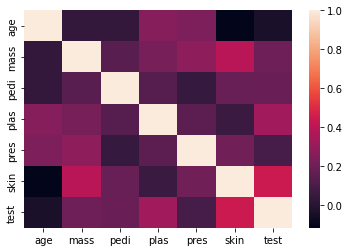

In [13]:
sns.heatmap(df_num.corr())
plt.show()

#### 4) The independent variables are linearly related to the log odds

We need to check the assumption of Independent variables are linearly related to the log odds.

One way to checking this is to plot the Independent variables in question and look for an S-shaped curve.

In [14]:
df2 = data

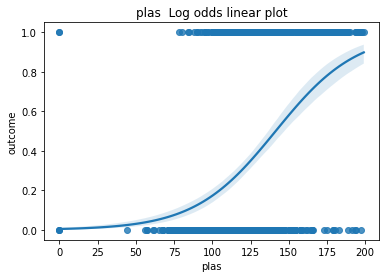

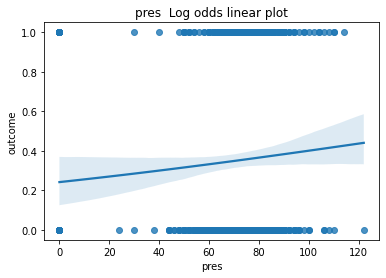

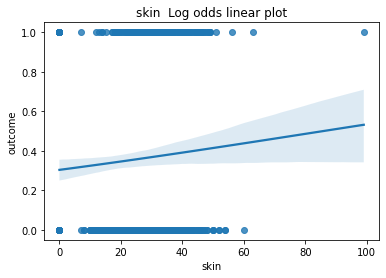

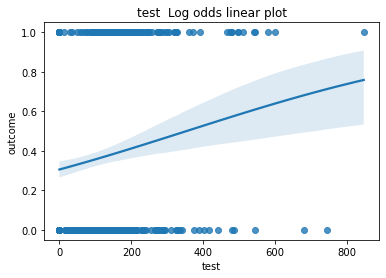

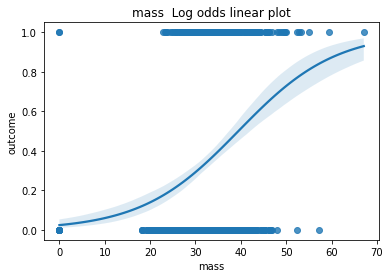

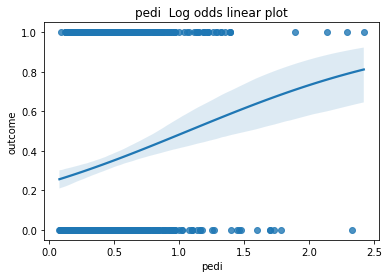

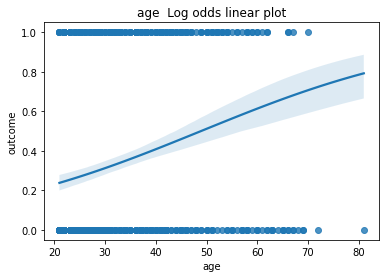

In [15]:
for i in range(len(num_variables)):
    title = num_variables[i] + '  Log odds linear plot'
    xvar  = num_variables[i]
    check_linearity(xvar,    df2, title, target)

#### 5) Logistic regression requires quite a large number of observations.

A general rule of thumb is that at least 10 per variable.

We have 768 observations and 9 variables; so we have approximately 85 observations per variable.

### Model Building

Logistic Regression is a classification algorithm that is used to predict the probability of a target variable which is categorical. Here, the target variable is a dichotomous variable that contains data coded as 1 (desired outcome like success) or 0 (Example: failure).

We have two popular options for building a logistic regression model; they are scikit-learn and StatsModels.

Good thing about statsmodels is the summary output it produces. Students with R back ground will like it as it looks familiar.

In [16]:
X, Y       = split_target_predictor(data, 'outcome')
X_names    = list(data.columns)

In [17]:
X_names.remove('outcome')
X          = pd.DataFrame(X)
X.columns  = X_names 

print(X.head().T)

           0        1       2        3        4
plas  85.000  183.000  89.000  137.000  116.000
pres  66.000   64.000  66.000   40.000   74.000
skin  29.000    0.000  23.000   35.000    0.000
test   0.000    0.000  94.000  168.000    0.000
mass  26.600   23.300  28.100   43.100   25.600
pedi   0.351    0.672   0.167    2.288    0.201
age   31.000   32.000  21.000   33.000   30.000


In [18]:
import numpy as np
X_train, X_test, Y_train, Y_test = split_train_test(X, Y, 0.3, 12345)

In [19]:
vals, counts = np.unique(Y_test, return_counts = True)
print(vals, counts)

[0. 1.] [152  79]


In [20]:
print("\nShape: Total observations %d Total features %d" %(X_train.shape[0], X_train.shape[1]))


Shape: Total observations 536 Total features 7


In [21]:
logit = sm.Logit( Y_train, sm.add_constant( X_train ) )
lg    = logit.fit()

Optimization terminated successfully.
         Current function value: 0.456024
         Iterations 7


### Report Psuedo R-square, model coefficients and p-value

In [22]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  536
Model:                          Logit   Df Residuals:                      528
Method:                           MLE   Df Model:                            7
Date:                Wed, 13 Jul 2022   Pseudo R-squ.:                  0.2962
Time:                        01:54:04   Log-Likelihood:                -244.43
converged:                       True   LL-Null:                       -347.28
Covariance Type:            nonrobust   LLR p-value:                 7.119e-41
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.3571      0.904    -10.351      0.000     -11.129      -7.585
plas           0.0344      0.004      7.765      0.000       0.026       0.043
pres          -0.0164      0.007     -2.467      0.0

**Observation**

We observe that the McFadden R square (Pseudo R square) is 25.50 % and the model fitness is good.
This McFadden approach is one minus the ratio of two log likelihoods. The numerator is the log likelihood of the logit model selected and the denominator is the log likelihood if the model just had an intercept.

A goodness of fit using McFadden‟s pseudo r square (ρ^2) is used for fitting the overall model. McFadden suggested ρ^2 values of between 0.2 and 0.4 should be taken to represent a very good fit of the model (Louviere et al.,2000).
http://www.lifesciencesite.com/lsj/life1002/286_B01288life1002_2028_2036.pdf

### List the significant variables at 5% level of significance

In [23]:
significant_vars = get_significant_vars( lg, sig_level = 0.05 )
print(significant_vars)

['const', 'plas', 'pres', 'mass', 'pedi', 'age']


**Observation**

The following variables are significant at 5 % level of significance:

| SlNo | Significant variable |                      | 
| ---- | -------------------- | -------------------- |   
| 1 | preg | Number of times pregnant | 
| 2 | plas | Plasma glucose concentration a 2 hours in an oral glucose tolerance test | 
| 3 | pres | Diastolic blood pressure (mm Hg) | 
| 4 | mass | Body mass index (weight in kg/(height in m)^2) | 
| 5 | pedi | Diabetes pedigree function | 


### Get Odds ratio

In [24]:
drop_vars = X_names
print(type(drop_vars))
significant_vars.remove('const')

<class 'list'>


In [25]:
print(significant_vars)
print(drop_vars)

['plas', 'pres', 'mass', 'pedi', 'age']
['plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']


In [26]:
for i in range(len(significant_vars)):
    print(significant_vars[i])
    rm = significant_vars[i]
    drop_vars.remove(rm)

print(drop_vars)

plas
pres
mass
pedi
age
['skin', 'test']


In [27]:
print(np.exp(lg.params))
print(type(np.exp(lg.params)))

const    0.000086
plas     1.035004
pres     0.983691
skin     0.996911
test     0.998467
mass     1.120315
pedi     3.205378
age      1.044562
dtype: float64
<class 'pandas.core.series.Series'>


In [28]:
drop_vars.append('const')

In [29]:
np.exp(lg.params).reindex(significant_vars).sort_values(ascending = False)
 

pedi    3.205378
mass    1.120315
age     1.044562
plas    1.035004
pres    0.983691
dtype: float64

### Odds Ratio Interpretation for significant variables

Holding other things constant:

| Slno | Inference |
| ----- | ------------------------------------- |
| 1 | For a patient, one unit increase in Diabetes pedigree function, the odds of getting Diabetes increases by 114%.|
| 2 | For a patient, one more pregnancy, the odds of getting Diabetes increases by 13%.|
| 3 | For a patient, one unit increase in BMI, the odds of getting Diabetes increases by 9%.|
| 4 | For a patient, one unit increase in plasma glucose tolerance test, the odds of getting Diabetes increases by 3%.|
| 5 | For a patient, one unit (mm/Hg) increase in Diastolic blood pressure (mm Hg), the odds of getting Diabetes decreases by 1%.|





Training Data
[[304  44]
 [ 68 120]]


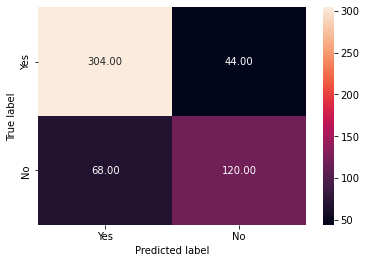

Training Accuracy: 79.104%

Testing Data
[[128  24]
 [ 39  40]]


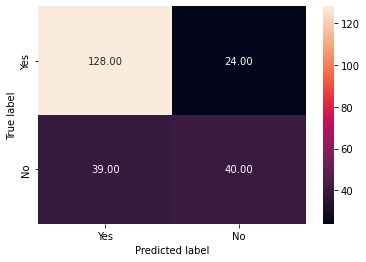

Test Accuracy: 72.727%

Training data
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       348
         1.0       0.73      0.64      0.68       188

    accuracy                           0.79       536
   macro avg       0.77      0.76      0.76       536
weighted avg       0.79      0.79      0.79       536


Testing data
              precision    recall  f1-score   support

         0.0       0.77      0.84      0.80       152
         1.0       0.62      0.51      0.56        79

    accuracy                           0.73       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231


Training data


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

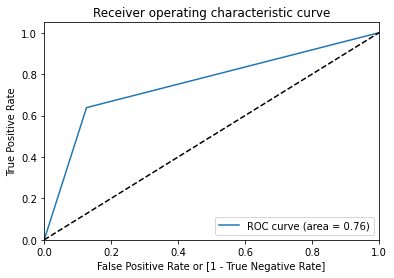

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Testing data


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


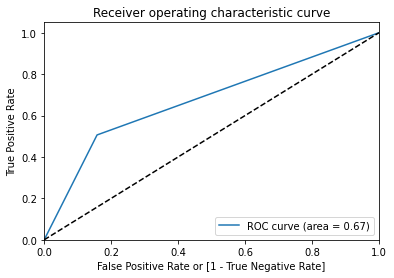

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



With K fold cross validation

Scoring:  accuracy


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[0.7962963  0.75925926 0.75925926 0.7037037  0.7037037  0.68518519
 0.90566038 0.8490566  0.83018868 0.90566038]

Accuracy: 0.790 (0.077)

Scoring:  precision


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[0.77777778 0.75       0.64705882 0.61111111 0.6        0.65217391
 0.92857143 0.83333333 0.88888889 0.8125    ]

Precision: 0.750 (0.112)

Scoring:  recall


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[0.66666667 0.57142857 0.61111111 0.55       0.6        0.625
 0.76470588 0.625      0.5        0.86666667]

Recall: 0.638 (0.101)

Scoring:  roc_auc
[0.87157287 0.8008658  0.80709877 0.82205882 0.79264706 0.73194444
 0.90522876 0.93243243 0.86655405 0.93333333]

AUROC: 0.846 (0.063)
None


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [30]:
n_splits, random_state = 10, 12345
                     
print(logit_reg(n_splits, random_state, X_train, X_test, Y_train, Y_test ))

### To get the elapsed time, get the end time of processing

In [31]:
logit_elapsed_time_secs = time.time() - start_time

logit_elapsed_time_msg = "LR model - Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(logit_elapsed_time_secs))

print(logit_elapsed_time_msg)   

LR model - Execution took: 0:00:26 secs (Wall clock time)
